# Avocado Classifier
Building a logistic regression model with a neural network to classify pictures as either "Avocado" or "Not an avocado".

## Overview of workflow: 

***

   ### Step 1 -- Gather data.
   ### Step 2 -- Preprocess the data.
   ### Step 3 -- Write functions that will be used to build the logistic regression model.
   ### Step 4 -- Build the logistic regression model by calling the functions made in Step 3. 
   ### Step 5 -- Evaluate the performance of the model and adjust parameters for best results.
   ### Step 6 -- Use your best model from step 4 to make a prediction! 
   
  
 ***




### Step 1 -- Gather data:
- go to a website like `kaggle.com` and download a directory of images.  For this project, I think a minimum of 300 should be sufficient. 
- to get this data, go to https://www.kaggle.com/moltean/fruits.



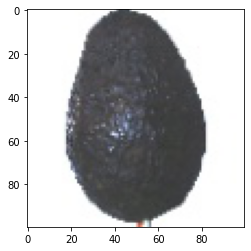

In [6]:
import matplotlib.pyplot as plt
from PIL import Image


avocado_im = Image.open('avocado.jpg')
plt.imshow(avocado_im)

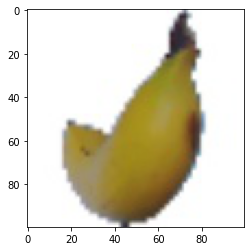

In [7]:
import matplotlib.pyplot as plt
from PIL import Image


banana_im = Image.open('banana.jpg')
plt.imshow(banana_im)

In [13]:
import numpy as np


avocado_pix = np.array(avocado_im.getdata())
print(avocado_pix)

[[255 255 255]
 [255 255 255]
 [255 255 255]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]


### Step 2 -- Preprocess the data: 
- retrieve pink_lady pixel data and convert to array type object (**Cell 2.1**)
- retrieve a portion of pixel data from other apple directories and convert to array type object (**Cell 2.2**)
- label both arrays with y-values, concatenate the arrays, shuffle them, split into test and train, print to a file that stores the type of the object for storage/later usage (**Cell 2.3**)
- preprocess data into x_train, y_train, x_test, and y_test objects objects of the correct type (**Cell 2.4**)


 ### Questions about step 2:  
1. **Cell 2.2, lines 18-9**:  Without this line, I get an error saying that the directory ".../Apple Red Delicios" doesn't exist when it does!  Why is that?  As of this morning, the ".../Apple Braeburn" directory apparently doesn't exist.
2.  Do you actually have to shuffle the data before you start building the model? I don't see how it makes any difference.

In [2]:
pwd

'/Users/mariagarza/Desktop/CourseraNotebooks/Deeplearning.ai'

In [66]:
""" ----------Cell 1.1----------""" 


# retrieves pink_lady pixel data and puts it into an 3-D array
from PIL import Image
import numpy as np
import os
from tqdm import tqdm


test_directory = "/Users/mariagarza/Desktop/CourseraNotebooks/Deeplearning.ai/fruits-360/Test"


pinklady_pixels = np.empty((10000,3), int)
for directory in os.listdir(test_directory): 
     if directory == "Avocado": 
        path = os.path.join(test_directory, directory)
        for image_path in os.listdir(path):
            image_path = os.path.join(path, image_path) + f"/fruits-360/Test/{directory}"
            for image in os.listdir(image_path):
                image = os.path.join(image_path, image)
                im = Image.open(image, 'r')
                width, height = im.size
                pixel_values = np.array(im.getdata())
                pinklady_pixels = np.append(pinklady_pixels, pixel_values, axis=0)
                
m = int(pinklady_pixels.shape[0]/10000)
pinklady_pixels = pinklady_pixels.reshape(m, 100*100, 3)

In [67]:
pinklady_pixels.shape

(144, 10000, 3)

In [68]:
pinklady_pixels[-1]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [69]:
"""----------Cell 1.2----------"""


# retrieves pixel data from 15 images taken from other apple directories and converts the data to 3-D array object 
from PIL import Image
import numpy as np
import os
from tqdm import tqdm

test_directory = "/Users/mariagarza/Desktop/CourseraNotebooks/Deeplearning.ai/fruits-360/Test"


gen_apple_pixels = np.empty((10000,3), int)
for directory in os.listdir(test_directory): 
    if directory.startswith("Avocado"):
        continue
    if ".DS_Store" in directory: 
        continue
    else:
        path = os.path.join(test_directory, directory)
        i=0
        for image_path in os.listdir(path):
            image_path = os.path.join(path, image_path) + f"/fruits-360/Test/{directory}"
            i+=1
            if i>1:
                continue
            for image in os.listdir(image_path):
                image = os.path.join(image_path, image)
                im = Image.open(image, 'r')
                width, height = im.size
                pixel_values = np.array(im.getdata())
                gen_apple_pixels = np.append(gen_apple_pixels, pixel_values, axis=0)
                        

In [70]:
m = int(gen_apple_pixels.shape[0]/10000)
gen_apple_pixels = gen_apple_pixels.reshape(m, 100*100, 3)

In [71]:
gen_apple_pixels.shape

(130, 10000, 3)

In [72]:
gen_apple_pixels[-1]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       ...,
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [73]:
 """----------Cell 1.3----------"""
    

#Skip this cell and go on to the next run Cell 1.3a-i to just get the objects x_train, x_test, y_train, y_test.


import pandas as pd


# labels both arrays with y values
pinklady_pix_and_tags = np.ones((pinklady_pixels.shape[0], pinklady_pixels.shape[1], pinklady_pixels.shape[2]+1))
pinklady_pix_and_tags[:, :, :-1] = pinklady_pixels

gen_apple_pix_and_tags = np.zeros((gen_apple_pixels.shape[0], gen_apple_pixels.shape[1], gen_apple_pixels.shape[2]+1))
gen_apple_pix_and_tags[:, :, :-1]= gen_apple_pixels


# concatenates and shuffles the arrays
apple_pix_and_tags = np.concatenate((pinklady_pix_and_tags, gen_apple_pix_and_tags))
np.random.shuffle(apple_pix_and_tags)

# stores the y-labels into a (1, apple_pix_and_tags.shape[0]) array
# splits into train and test 
# prints train and test to a csv file.
y = np.empty((1, apple_pix_and_tags.shape[0]), dtype=np.int64)
i = 0
for array in apple_pix_and_tags: 
    y[0][i] = array[0][3]
    i+=1
    
m_train = round(y.shape[-1]*.8)
m_test = y.shape[-1] - m_train    

    
y_train = np.empty((1, m_train), int)
i = 0
for element in y[0][0:m_train]:
    #print(element)
    y_train[0][i] = element
    i+=1
    
y_test = np.empty((1, m_test), int)
i=0
for element in y[0][m_train:]: 
    y_test[0][i] = element
    i+=1

df_y_train = pd.DataFrame(y_train)
df_y_train.to_csv('y_train.csv')

df_y_test = pd.DataFrame(y_test)
df_y_test.to_csv('y_test.csv')
    


# deletes the labels from apple_pix_and_tags
# reshapes the 3-D array to a printable 2-D array
# runs assertion test to make sure that x[0] and y[-1] are  the same length 
# splits into train and test 
# prints train and test to csv file
x_start = np.delete(apple_pix_and_tags[0], 3, 1)
for array in apple_pix_and_tags[1:]: 
    x = np.vstack((x_start, (np.delete(array, 3, 1))))
    x_start = x

x = x.reshape(319, 100*100*3)

assert((round(y.shape[-1]*.8)) == (round(x.shape[0]*.8)))

x_train = x[:(round(y.shape[-1]*.8))]
x_test = x[(round(y.shape[-1]*.8)):]

df_x_train = pd.DataFrame(x_train)
df_x_train.to_csv('x_train.csv')

df_x_test = pd.DataFrame(x_test)
df_x_test.to_csv('x_test.csv')


ValueError: cannot reshape array of size 8220000 into shape (319,30000)

In [74]:
 """----------Cell 1.3a----------"""


# labels both arrays with y values
pinklady_pix_and_tags = np.ones((pinklady_pixels.shape[0], pinklady_pixels.shape[1], pinklady_pixels.shape[2]+1))
pinklady_pix_and_tags[:, :, :-1] = pinklady_pixels

gen_apple_pix_and_tags = np.zeros((gen_apple_pixels.shape[0], gen_apple_pixels.shape[1], gen_apple_pixels.shape[2]+1))
gen_apple_pix_and_tags[:, :, :-1]= gen_apple_pixels

In [75]:
 """----------Cell 1.3b----------"""


# concatenates and shuffles the arrays
apple_pix_and_tags = np.concatenate((pinklady_pix_and_tags, gen_apple_pix_and_tags))
np.random.shuffle(apple_pix_and_tags)

In [76]:
 """----------Cell 1.3c----------"""


apple_pix_and_tags.shape

(274, 10000, 4)

In [77]:
 """----------Cell 1.3d----------"""


y = np.empty((1, apple_pix_and_tags.shape[0]), dtype=np.int64)
i = 0
for array in apple_pix_and_tags: 
    y[0][i] = array[0][3]
    i+=1

In [78]:
m_train = round(y.shape[-1]*.8)
m_test = y.shape[-1] - m_train
print(m_test+ m_train)

274


In [79]:
 """----------Cell 1.3e----------"""

    
m_train = round(y.shape[-1]*.8)
m_test = y.shape[-1] - m_train    

    
y_train = np.empty((1, m_train), int)
i = 0
for element in y[0][0:m_train]:
    #print(element)
    y_train[0][i] = element
    i+=1
    
y_test = np.empty((1, m_test), int)
i=0
for element in y[0][m_train:]: 
    y_test[0][i] = element
    i+=1

In [80]:
 """----------Cell 1.3f----------"""


x_start = np.delete(apple_pix_and_tags[0], 3, 1)
for array in apple_pix_and_tags[1:]: 
    x = np.vstack((x_start, (np.delete(array, 3, 1))))
    x_start = x

In [81]:
int(x.shape[0]/10000)

274

In [82]:
 """----------Cell 1.3g----------"""

x = x.reshape(int(x.shape[0]/10000), 100*100*3)

In [83]:
 """----------Cell 1.3h----------"""


assert((round(y.shape[-1]*.8)) == (round(x.shape[0]*.8)))

In [84]:
 """----------Cell 1.3i----------"""


x_train = x[:(round(y.shape[-1]*.8))]
x_test = x[(round(y.shape[-1]*.8)):]



In [85]:
 """----------Cell 1.4----------"""
    
    
# preprocess x_train and x_test, and standardize

x_train_flatten = x_train.reshape(x_train.shape[1], x_train.shape[0])
x_test_flatten = x_test.reshape(x_test.shape[1], x_test.shape[0])
print(x_train_flatten.shape, x_test_flatten.shape)


x_train_stan = x_train_flatten/255
x_test_stan = x_test_flatten/255
print(x_train_stan[0], x_test_stan[0])

(30000, 219) (30000, 55)
[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99607843 1.         0.97647059 0.99607843 1.         0.98039216
 0.99607843 0.99607843 0.98823529 1.         1.         1.
 1.         0.99607843 1.         0.99607843 0.99215686 1.
 0.99607843 0.99215686 1.         1.         1.         1.
 1.         1.         0.99215686 0.98823529 0.99215686 0.96862745
 1.         1.         0.97254902 1.         1.         0.98039216
 0.98823529 0.99215686 0.97254902 0.99607843 0.99607843 0.99607843
 1.         1.         1.         0.98431373 0.98039216 1.

### Step 3:  Write functions that will be used to build the logistic regression model--i.e. write a function that:
  - computes *sigmoid(z)* (**Cell 3.1**)
  - creates a vector of zeros of shape (dim, 1) for w and initializes b to 0. (**Cell 3.2**)
  - implements the cost function and its gradient for forward and backward propagation (**Cell 3.3**)
  - optimizes w and b by running a gradient descent algorithm (**Cell 3.4**)
  - predicts whether the label is 0 or 1 using learned logistic regression parameters (w, b)(**Cell 3.5**)

In [86]:
 """----------Cell 3.1----------"""


# computes *sigmoid(z)* 

def sigmoid(z):
    """
    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1 / (1 + np.exp(-z))
    
    return s

In [87]:
 """----------Cell 3.2----------"""


# creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

def initialize_with_zeros(dim):
    """
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
     
    w = np.zeros((dim, 1))
    b = 0
  
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [88]:
 """----------Cell 3.3----------"""
    

# implements the cost function and its gradient for the propagation explained above

def propagate(w, b, X, Y):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.add(np.dot(w.T, X), b))                                    # compute activation
    cost = (-(1/m))*np.sum((Y*np.log(A))+((1-Y)*np.log(1-A)))                                # compute cost
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = np.dot(1/m, np.dot(X, ((np.add(A, -1*Y)).T)))
    db = np.dot(1/m, np.sum(np.add(A, -Y)))

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [89]:
 """----------Cell 3.4----------"""
    

# optimizes w and b by running a gradient descent algorithm

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        grads, cost = propagate(w, b, X, Y)
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [90]:
 """----------Cell 3.5----------"""


#  predicts whether the label is 0 or 1 using learned logistic regression parameters (w, b)

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.add(np.dot(w.T, X), b))
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0][i] > .5: 
            Y_prediction[0][i] = 1
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

### Step 4 -- build the logistic regression model by calling the functions made in Step 3 (Cell 4).


In [91]:
 """----------Cell 4----------"""


# builds the logistic regression model by calling the function you've implemented previously

def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = True):
    """
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(len(X_train))

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = True)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

### Step 5 -- evaluate the performance of the model and adjust parameters for best results.

In [100]:
 """----------Cell 5.1----------"""

pinklady_model = model(x_train_stan, y_train, x_test_stan, y_test, num_iterations = 8000, learning_rate = 0.0007, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.669915
Cost after iteration 200: 0.659115
Cost after iteration 300: 0.650334
Cost after iteration 400: 0.642744
Cost after iteration 500: 0.635988
Cost after iteration 600: 0.629862
Cost after iteration 700: 0.624234
Cost after iteration 800: 0.619013
Cost after iteration 900: 0.614135
Cost after iteration 1000: 0.609550
Cost after iteration 1100: 0.605220
Cost after iteration 1200: 0.601117
Cost after iteration 1300: 0.597215
Cost after iteration 1400: 0.593495
Cost after iteration 1500: 0.589941
Cost after iteration 1600: 0.586536
Cost after iteration 1700: 0.583270
Cost after iteration 1800: 0.580132
Cost after iteration 1900: 0.577112
Cost after iteration 2000: 0.574201
Cost after iteration 2100: 0.571392
Cost after iteration 2200: 0.568678
Cost after iteration 2300: 0.566054
Cost after iteration 2400: 0.563513
Cost after iteration 2500: 0.561050
Cost after iteration 2600: 0.558662
Cost after iteration 2700: 0.556344
Cost

### Step 6 -- Use your best model from step 4 and make a prediction! 

#### Question about step 6:  
 1. I can't make any predictions because the return value "d" from the model function "is not defined".  How can we solve this problem? 

In [33]:
import imageio
from skimage.transform import resize


num_px = 100 
image = imageio.imread('strawberry.jpeg')
image = image/255.
image = resize(image, (100, 100),
                       anti_aliasing=True)
my_image = image.reshape(100*100*3, 1)
my_predicted_image = predict(pinklady_model["w"], pinklady_model["b"], my_image)

In [34]:
my_predicted_image

array([[1.]])